# Project Report
By Michael Geiger

### Project Overview
For my data science project this semester, I would like to investigate how accurately you can predict whether or not the outcome of an NFL game will fall within the projected outcome, spread, and over/under for a specific game. These predictions will be based on historical betting data, NFL game matchups and outcomes, and various environmental conditions such as stadium location and weather conditions. With the rise of sports gambling in all professional sports in the United States, a predictive model that can accurate prove/disprove projected betting odds for any game is an incredibly valuable tool. With the NFL being one of the most popular sports in the US, a predictive tool for personal-gambling purposes would be incredibly valuable for use in states where sports gambling is currently legal. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
#import kaggle
import codecs
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [2]:
#api = KaggleApi()
#nfl_teams = api.datasets_download_file("tobycrabtree/nfl-scores-and-betting-data","downloads/nfl_teams.csv/11", "nfl_teams.csv")

In [3]:
nfl_teams = pd.read_csv("nfl_teams.csv")
nfl_stadiums = pd.read_csv("nfl_stadiums.csv", encoding='cp437')
nfl_scores = pd.read_csv("spreadspoke_scores.csv")
nfl_teams#.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [4]:
nfl_stadiums.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",02467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
3,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arrowhead Stadium,"Kansas City, MO",1972.0,NaN,outdoor,"1 Arrowhead Dr, Kansas City, MO 64129",64129,cold,"76,416",Grass,US1MOJC0028,"KANSAS CITY 5.1 SE, MO US",39.0692,-94.4871,264.9


In [5]:
nfl_scores.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [6]:
cleaned_teams = nfl_teams.drop(labels=[1,2,15,20,22,26,30,37,38]).drop(labels=['team_name_short','team_id','team_id_pfr','team_conference_pre2002','team_division_pre2002'],axis=1).reset_index(drop=True)

In [7]:
cleaned_teams.columns=['Team', 'Conference', 'Division']
cleaned_teams

,Team,Conference,Division
0,Arizona Cardinals,NFC,NFC West
1,Atlanta Falcons,NFC,NFC South
2,Baltimore Ravens,AFC,AFC North
3,Buffalo Bills,AFC,AFC East
4,Carolina Panthers,NFC,NFC South
5,Chicago Bears,NFC,NFC North
6,Cincinnati Bengals,AFC,AFC North
7,Cleveland Browns,AFC,AFC North
8,Dallas Cowboys,NFC,NFC East
9,Denver Broncos,AFC,AFC West


In [8]:
stadiums = nfl_stadiums.drop(labels=['stadium_address','stadium_weather_station_code','stadium_open','stadium_close','STATION','NAME','LATITUDE','LONGITUDE'], axis=1)
stadiums.head()#.loc[lambda stadiums:stadiums['stadium_name']=='Edward Jones Dome']

,stadium_name,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,ELEVATION
0,Alamo Dome,"San Antonio, TX",indoor,dome,72000,FieldTurf,NaN
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN
2,Alumni Stadium,"Chestnut Hill, MA",outdoor,cold,NaN,Grass,NaN
3,Anaheim Stadium,"Anaheim, CA",outdoor,warm,NaN,NaN,NaN
4,Arrowhead Stadium,"Kansas City, MO",outdoor,cold,"76,416",Grass,264.9


In [9]:
recent_regscores = nfl_scores.loc[lambda nfl_scores: nfl_scores['schedule_season'] >= 2010].loc[lambda nfl_scores: nfl_scores['schedule_playoff'] == False].loc[lambda nfl_scores: nfl_scores['stadium_neutral'] == False]
recent_regscores = recent_regscores.drop(labels=['schedule_playoff','stadium_neutral'], axis=1)
recent_regscores.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10008,09/09/2010,2010,1,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,72.0,0.0,NaN,DOME
10009,09/12/2010,2010,1,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,64.0,7.0,81,NaN
10010,09/12/2010,2010,1,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,75.0,1.0,45,NaN
10011,09/12/2010,2010,1,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,89.0,5.0,NaN,DOME (Open Roof)
10012,09/12/2010,2010,1,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,91.0,1.0,67,NaN


DOME                    538
Rain                     98
DOME (Open Roof)         56
Fog                      25
Rain | Fog               18
Snow                     13
Snow | Fog                5
Snow | Freezing Rain      1
Name: weather_detail, dtype: int64


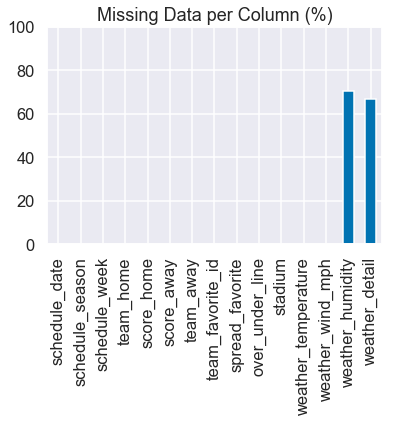

In [10]:
missings = recent_regscores.isnull().sum()/len(recent_regscores)*100
missings.plot.bar(title='Missing Data per Column (%)',ylim=[0,100])
print(recent_regscores['weather_detail'].value_counts())

In [11]:
recent_regscores = recent_regscores.drop(labels=['weather_humidity','weather_detail'], axis=1)
recent_regscores.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,weather_temperature,weather_wind_mph
10008,09/09/2010,2010,1,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,Louisiana Superdome,72.0,0.0
10009,09/12/2010,2010,1,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,Ralph Wilson Stadium,64.0,7.0
10010,09/12/2010,2010,1,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,Soldier Field,75.0,1.0
10011,09/12/2010,2010,1,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,Reliant Stadium,89.0,5.0
10012,09/12/2010,2010,1,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,EverBank Field,91.0,1.0


In [12]:
recent_regscores['team_home'].value_counts()

Chicago Bears           72
New York Jets           72
Washington Redskins     72
New England Patriots    72
Seattle Seahawks        72
Arizona Cardinals       72
New Orleans Saints      72
Indianapolis Colts      72
New York Giants         72
Carolina Panthers       72
Pittsburgh Steelers     72
Detroit Lions           72
Green Bay Packers       72
Baltimore Ravens        72
Philadelphia Eagles     72
Tennessee Titans        72
Houston Texans          72
Denver Broncos          72
Dallas Cowboys          72
Tampa Bay Buccaneers    71
San Francisco 49ers     71
Atlanta Falcons         71
Cleveland Browns        71
Cincinnati Bengals      71
Kansas City Chiefs      71
Minnesota Vikings       70
Miami Dolphins          70
Oakland Raiders         68
Buffalo Bills           68
Jacksonville Jaguars    66
San Diego Chargers      56
St. Louis Rams          47
Los Angeles Rams        22
Los Angeles Chargers    15
Name: team_home, dtype: int64

In [13]:
scores = recent_regscores.replace(to_replace='San Diego Chargers',value='Los Angeles Chargers').replace(to_replace='St. Louis Rams',value='Los Angeles Rams')

In [14]:
data = scores.merge(cleaned_teams, how='left', left_on='team_home', right_on='Team').merge(cleaned_teams, how='left',left_on='team_away',right_on='Team',suffixes=('_Home','_Away')).drop(labels=['Team_Home','Team_Away'],axis=1)
data = data.merge(stadiums,how='left',left_on='stadium',right_on='stadium_name').drop(labels=['stadium_name','stadium_weather_type'],axis=1)
data.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,weather_wind_mph,Conference_Home,Division_Home,Conference_Away,Division_Away,stadium_location,stadium_type,stadium_capacity,stadium_surface,ELEVATION
0,09/09/2010,2010,1,New Orleans Saints,14,9,Minnesota Vikings,NO,-5.0,49.5,...,0.0,NFC,NFC South,NFC,NFC North,"New Orleans, LA",indoor,"76,468",FieldTurf,NaN
1,09/12/2010,2010,1,Buffalo Bills,10,15,Miami Dolphins,MIA,-3.0,39,...,7.0,AFC,AFC East,AFC,AFC East,"Orchard Park, NY",outdoor,"73,967",FieldTurf,178.0
2,09/12/2010,2010,1,Chicago Bears,19,14,Detroit Lions,CHI,-6.5,45,...,1.0,NFC,NFC North,NFC,NFC North,"Chicago, IL",outdoor,"61,500",Grass,177.7
3,09/12/2010,2010,1,Houston Texans,34,24,Indianapolis Colts,IND,-1.0,48,...,5.0,AFC,AFC South,AFC,AFC South,"Houston, TX",retractable,"71,500",Grass,13.4
4,09/12/2010,2010,1,Jacksonville Jaguars,24,17,Denver Broncos,JAX,-3.0,41.5,...,1.0,AFC,AFC South,AFC,AFC West,"Jacksonville, FL",outdoor,"67,264",Grass,6.1


In [15]:
missing_data = data.isnull().sum()#/len(missing_data)
missing_data#.plot.bar(title='Missing Data per Column (%)',ylim=[0,100])

schedule_date            0
schedule_season          0
schedule_week            0
team_home                0
score_home               0
score_away               0
team_away                0
team_favorite_id         0
spread_favorite          0
over_under_line          0
stadium                  0
weather_temperature      0
weather_wind_mph         0
Conference_Home          0
Division_Home            0
Conference_Away          0
Division_Away            0
stadium_location        86
stadium_type            86
stadium_capacity       265
stadium_surface        265
ELEVATION              394
dtype: int64

In [16]:
bla = data.loc[lambda data:data['stadium_location'].isnull()==True]
bla['stadium'].value_counts()

FedEx Field              72
Mercedes-Benz Stadium     8
TIAA Bank Field           6
Name: stadium, dtype: int64

In [17]:
bla = data.loc[lambda data:data['stadium_capacity'].isnull()==True]
bla['stadium'].value_counts()

FedEx Field              72
Sun Life Stadium         55
Edward Jones Dome        47
Candlestick Park         31
Mall of America Field    29
TCF Bank Stadium         17
Mercedes-Benz Stadium     8
TIAA Bank Field           6
Name: stadium, dtype: int64

In [18]:
bla = data.loc[lambda data:data['ELEVATION'].isnull()==True]
bla['stadium'].value_counts()

Ford Field                 73
FedEx Field                72
Georgia Dome               63
Louisiana Superdome        56
Edward Jones Dome          47
Mall of America Field      29
U.S. Bank Stadium          24
Mercedes-Benz Superdome    16
Mercedes-Benz Stadium       8
TIAA Bank Field             6
Name: stadium, dtype: int64

In [19]:
data.loc[data.stadium == 'FedEx Field',['stadium_location','stadium_type','stadium_capacity','stadium_surface','ELEVATION']] = 'Landover, MD','outdoor','82,000','Grass','60.0'
data.loc[data.stadium == 'Mercedes-Benz Stadium',['stadium_location','stadium_type','stadium_capacity','stadium_surface','ELEVATION']] = 'Atlanta, GA','retractable','71,000','FieldTurf','310.3'
data.loc[data.stadium == 'TIAA Bank Field',['stadium_location','stadium_type','stadium_capacity','stadium_surface','ELEVATION']] = 'Jacksonville, FL','outdoor','67,164','Grass','2.0'
data.loc[data.stadium == 'Edward Jones Dome',['stadium_capacity','stadium_surface','ELEVATION']] = '67,277','FieldTurf','142.0'
data.loc[data.stadium == 'Mall of America Field',['stadium_capacity','stadium_surface','ELEVATION']] = '64,121','FieldTurf','260.0'
data.loc[data.stadium == 'Sun Life Stadium',['stadium_capacity','stadium_surface']] = '64,767','Grass'
data.loc[data.stadium == 'Candlestick Park',['stadium_capacity','stadium_surface']] = '69,732','Grass'
data.loc[data.stadium == 'TCF Bank Stadium',['stadium_capacity','stadium_surface']] = '50,805','FieldTurf'
data.loc[data.stadium == 'Ford Field',['ELEVATION']] = '184.0'
data.loc[data.stadium == 'Georgia Dome',['ELEVATION']] = '304.0'
data.loc[data.stadium == 'Louisiana Superdome',['ELEVATION']] = '2.0'
data.loc[data.stadium == 'U.S. Bank Stadium',['ELEVATION']] = '260.0'
data.loc[data.stadium == 'Mercedes-Benz Superdome',['ELEVATION']] = '1.0'
#data = data.replace(to_replace='retractable')

In [20]:
missing_data = data.isnull().sum()
missing_data

schedule_date          0
schedule_season        0
schedule_week          0
team_home              0
score_home             0
score_away             0
team_away              0
team_favorite_id       0
spread_favorite        0
over_under_line        0
stadium                0
weather_temperature    0
weather_wind_mph       0
Conference_Home        0
Division_Home          0
Conference_Away        0
Division_Away          0
stadium_location       0
stadium_type           0
stadium_capacity       0
stadium_surface        0
ELEVATION              0
dtype: int64

In [21]:
data.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'score_home', 'score_away', 'team_away', 'team_favorite_id',
       'spread_favorite', 'over_under_line', 'stadium', 'weather_temperature',
       'weather_wind_mph', 'Conference_Home', 'Division_Home',
       'Conference_Away', 'Division_Away', 'stadium_location', 'stadium_type',
       'stadium_capacity', 'stadium_surface', 'ELEVATION'],
      dtype='object')

## Next Steps
Go through each column & assess what information is most valuable for my prediction model. 
- Remove date, season, & stadium columns
- Change the Home & Away teams to IDs
- Reclass Temperature, Wind, Capacity (change to float), & Elevation
- Remove old stadium locations
- Add columns for: actual winners, actual spread, actual O/U, H2H matchups, D2D matchups, C2C matchups, T/F prediction, T/F spread, T/F O/U